In [1]:
import pandas as pd


data = []

for i in range(50,6000,50):
    for mode in ['bbr','cubic']:
        f = open(mode + "_" + str(i) + "_h8", "r").readlines()
        throughput = float(f[-4].split("ytes")[1].split(' ')[2])
#         print(mode ,i,throughput)
        f = open(mode + "_" + str(i) + "_h3", "r").readlines()
        rtts = f[-1].split(' ')[3].split('/')
        min_rtt = float(rtts[0])
        avg_rtt = float(rtts[1])
        max_rtt = float(rtts[2])
        sdv_rtt = float(rtts[3])
        
        data.append([mode,i,throughput,min_rtt,avg_rtt,max_rtt,sdv_rtt])
        
for i in range(10,50,10):
    for mode in ['bbr','cubic']:
        f = open(mode + "_" + str(i) + "_h8", "r").readlines()
        throughput = float(f[-4].split("ytes")[1].split(' ')[2])
#         print(mode ,i,throughput)
        f = open(mode + "_" + str(i) + "_h3", "r").readlines()
        rtts = f[-1].split(' ')[3].split('/')
        min_rtt = float(rtts[0])
        avg_rtt = float(rtts[1])
        max_rtt = float(rtts[2])
        sdv_rtt = float(rtts[3])
        
        data.append([mode,i,throughput,min_rtt,avg_rtt,max_rtt,sdv_rtt])
        
data.append(['cubic',1,0.18,40.237,42.164,48.802,1.674])
data.append(['bbr',1,1.53,40.318,55.488,1088.197,111.076])

    
        

        
df = pd.DataFrame(data = data,
                  columns=['mode','queue_size','throughput','min_rtt','avg_rtt','max_rtt','sdv_rtt'])


        
df.head(200)        

,mode,queue_size,throughput,min_rtt,avg_rtt,max_rtt,sdv_rtt
0,bbr,50,46.4,40.505,55.051,128.326,7.793
1,cubic,50,47.2,41.716,70.272,94.455,9.082
2,bbr,100,46.4,40.457,54.357,131.252,7.284
3,cubic,100,46.9,41.465,114.951,150.550,19.143
4,bbr,150,34.1,40.545,48.442,120.286,5.961
...,...,...,...,...,...,...,...
195,cubic,4900,39.2,46.274,1752.188,3629.794,677.380
196,bbr,4950,37.2,40.129,49.514,133.296,10.018
197,cubic,4950,42.2,43.169,1506.690,2939.833,328.920
198,bbr,5000,46.1,40.363,59.114,126.456,9.780


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mode        248 non-null    object 
 1   queue_size  248 non-null    int64  
 2   throughput  248 non-null    float64
 3   min_rtt     248 non-null    float64
 4   avg_rtt     248 non-null    float64
 5   max_rtt     248 non-null    float64
 6   sdv_rtt     248 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


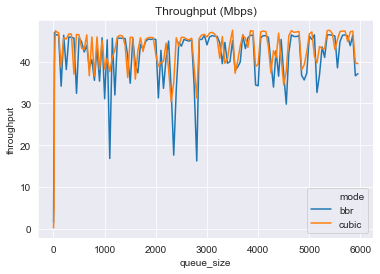

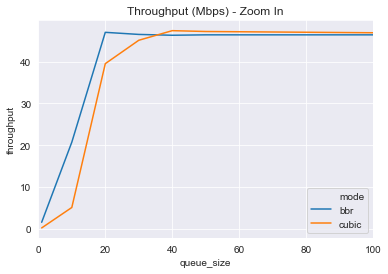

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# df.plot.line(x='queue_size',y='throughput',hue='mode')
sns.set_style("darkgrid")
sns.lineplot(x="queue_size", dashes=False, y="throughput", hue="mode", style="mode", data=df)
plt.title("Throughput (Mbps)")
plt.show()



sns.set_style("darkgrid")
sns.lineplot(x="queue_size", dashes=False, y="throughput", hue="mode", style="mode", data=df)
plt.title("Throughput (Mbps) - Zoom In")
plt.xlim(0, 100)
plt.show()


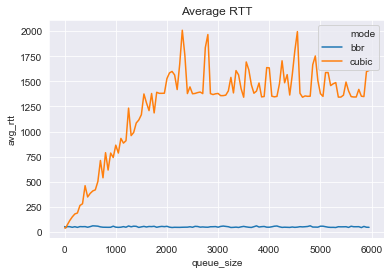

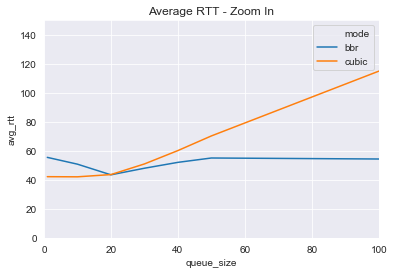

In [4]:
sns.lineplot(x="queue_size", dashes=False, y="avg_rtt", hue="mode", style="mode", data=df)
plt.title("Average RTT")
plt.show()

sns.lineplot(x="queue_size", dashes=False, y="avg_rtt", hue="mode", style="mode", data=df)
plt.title("Average RTT - Zoom In")
plt.xlim(0, 100)
plt.ylim(0, 150)
plt.show()

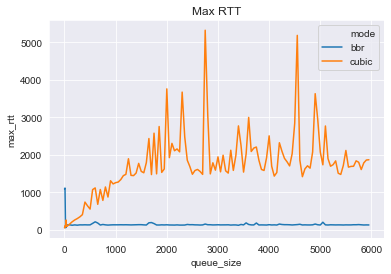

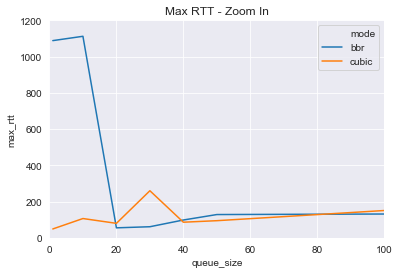

In [5]:
sns.lineplot(x="queue_size", dashes=False, y="max_rtt", hue="mode", style="mode", data=df)
plt.title("Max RTT")
plt.show()

sns.lineplot(x="queue_size", dashes=False, y="max_rtt", hue="mode", style="mode", data=df)
plt.title("Max RTT - Zoom In")
plt.xlim(0, 100)
plt.ylim(0, 1200)
plt.show()

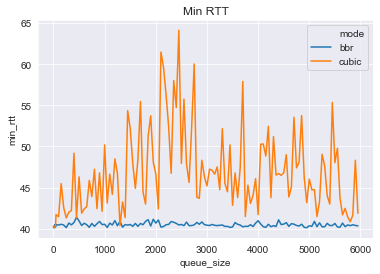

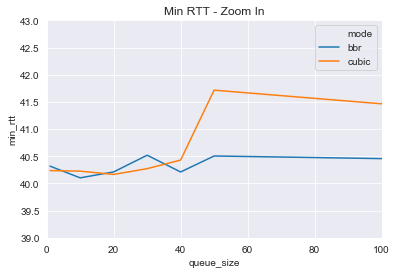

In [6]:
sns.lineplot(x="queue_size", dashes=False, y="min_rtt", hue="mode", style="mode", data=df)
plt.title("Min RTT")
plt.show()

sns.lineplot(x="queue_size", dashes=False, y="min_rtt", hue="mode", style="mode", data=df)
plt.title("Min RTT - Zoom In")
plt.xlim(0, 100)
plt.ylim(39, 43)
plt.show()

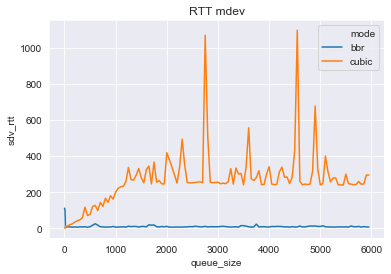

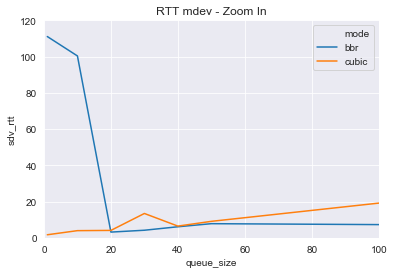

In [7]:
sns.lineplot(x="queue_size", dashes=False, y="sdv_rtt", hue="mode", style="mode", data=df)
plt.title("RTT mdev")
plt.show()

sns.lineplot(x="queue_size", dashes=False, y="sdv_rtt", hue="mode", style="mode", data=df)
plt.title("RTT mdev - Zoom In")
plt.xlim(0, 100)
plt.ylim(0, 120)
plt.show()